In [39]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats

STRATEGIES = ['allgather_A_col', 'allgather_A_col_no_compute',
              'allgather_A_row', 'allgather_A_row_no_compute',
              'allgather_B_col', 'allgather_B_col_no_compute',
              'allgather_B_row', 'allgather_B_row_no_compute',
              'reducescatter_C_col', 'reducescatter_C_col_no_compute',
              'reducescatter_C_row', 'reducescatter_C_row_no_compute',
              'algorithm1', 'algorithm1_no_compute',
              'algorithm2', 'algorithm2_no_compute',
              'throughput_test']

In [16]:
FILENAME = "n2-benchmark.csv"
df = pd.read_csv(FILENAME, names=["strategy", "size", "m", "n", "k", "throughput", "time", "correct"])

In [27]:
grouped = df.groupby('strategy')

# input the strategy name to get the df with that strategy
strategy_dict = {}

for strategy, group_df in grouped:
    strategy_dict[strategy] = group_df

In [32]:
strategy_dict["allgather_A_row"]

,strategy,size,m,n,k,throughput,time,correct
896,allgather_A_row,2,48,48,48,1.019211,0.000217,True
897,allgather_A_row,2,48,48,48,0.035546,0.006222,True
898,allgather_A_row,2,48,48,48,0.070446,0.003140,True
899,allgather_A_row,2,48,144,48,3.138831,0.000211,True
900,allgather_A_row,2,48,144,48,0.142765,0.004648,True
...,...,...,...,...,...,...,...,...
1266,allgather_A_row,2,720,480,720,8.193437,0.060739,True
1267,allgather_A_row,2,720,480,720,13.817121,0.036018,True
1268,allgather_A_row,2,720,720,720,15.928245,0.046866,True
1269,allgather_A_row,2,720,720,720,16.860359,0.044275,True


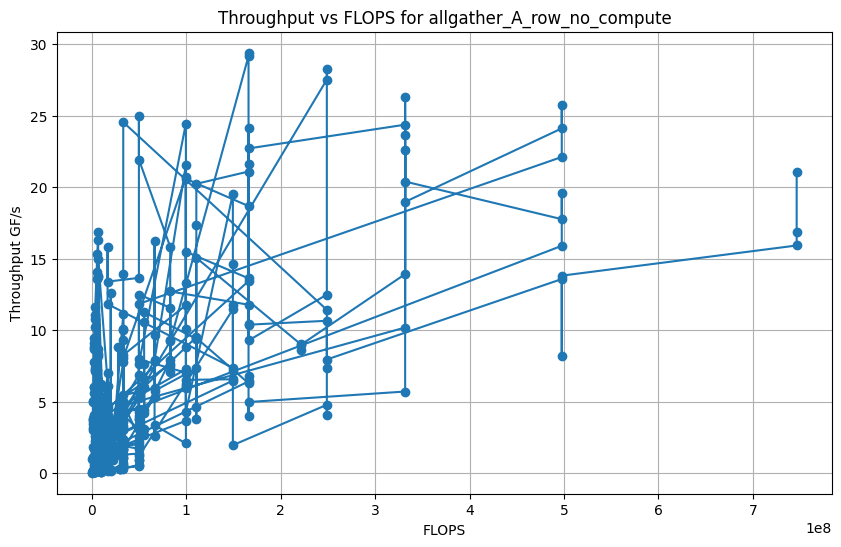

In [38]:
current_strategy = STRATEGIES[3]  #"throughput_test"
curr_df = strategy_dict[current_strategy]

# Calculate FLOPS
flops = 2 * strategy_df['m'] * strategy_df['n'] * strategy_df['k']
flops
# Plot throughput/FLOPS graph
plt.figure(figsize=(10, 6))
plt.plot(flops, strategy_df['throughput'], marker='o', linestyle='-')
plt.xlabel('FLOPS')
plt.ylabel('Throughput GF/s')
plt.title(f"Throughput vs FLOPS for {current_strategy}")
plt.grid(True)
plt.show()

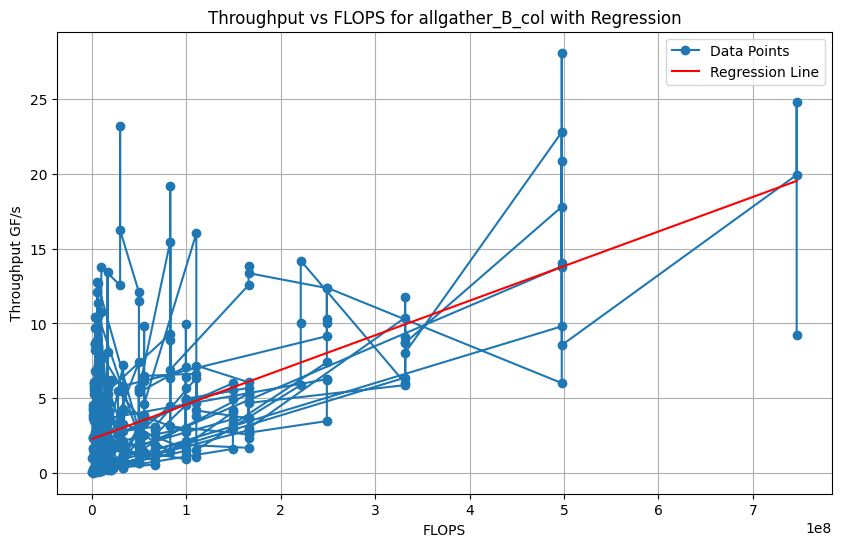

Slope: 2.3087931709815227e-08
Intercept: 2.2816780931028227
R-squared: 0.35634060651905475
P-value: 1.4195780672639763e-37
Standard Error: 1.606667510749904e-09


In [41]:
current_strategy = STRATEGIES[4]  #"throughput_test"
curr_df = strategy_dict[current_strategy]

# Calculate FLOPS
flops = 2 * curr_df['m'] * curr_df['n'] * curr_df['k']

# Perform linear regression
slope, intercept, r_value, p_value, std_err = stats.linregress(flops, curr_df['throughput'])

# Plot throughput/FLOPS graph with regression line
plt.figure(figsize=(10, 6))
plt.plot(flops, curr_df['throughput'], marker='o', linestyle='-', label='Data Points')
plt.plot(flops, intercept + slope * flops, linestyle='-', color='red', label='Regression Line')
plt.xlabel('FLOPS')
plt.ylabel('Throughput GF/s')
plt.title(f"Throughput vs FLOPS for {current_strategy} with Regression")
plt.legend()
plt.grid(True)
plt.show()

print(f"Slope: {slope}")
print(f"Intercept: {intercept}")
print(f"R-squared: {r_value**2}")
print(f"P-value: {p_value}")
print(f"Standard Error: {std_err}")

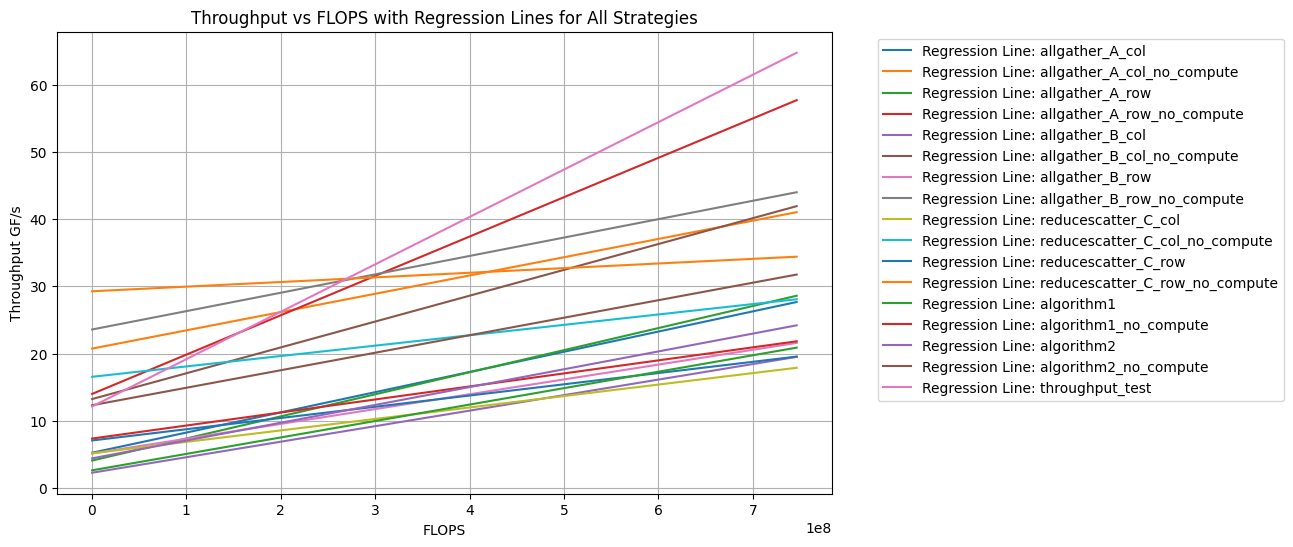

In [45]:
plt.figure(figsize=(10, 6))

# Iterate over each strategy
for strategy in STRATEGIES:
    # Select DataFrame for the current strategy
    curr_df = strategy_dict[strategy]
    
    # Calculate FLOPS
    flops = 2 * curr_df['m'] * curr_df['n'] * curr_df['k']
    
    # Perform linear regression
    slope, intercept, r_value, p_value, std_err = stats.linregress(flops, curr_df['throughput'])
    
    # Plot data points
    # plt.scatter(flops, curr_df['throughput'], label=strategy)
    
    # Plot regression line
    plt.plot(flops, intercept + slope * flops, linestyle='-', label=f'Regression Line: {strategy}')
    
# Add labels and title
plt.xlabel('FLOPS')
plt.ylabel('Throughput GF/s')
plt.title('Throughput vs FLOPS with Regression Lines for All Strategies')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.show()